In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
%matplotlib widget

In [2]:
def function2(x):
    return x**2

def function3(x):
    return (np.exp(3*x) - 1) * 0.1

def function(x):
    return x**5

def fprime(x):
    return 5*x**4

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

def chord(x, x0, slope):
    y_intercept = function(x0) - slope * x0
    return slope * x + y_intercept

def tangent_line(x, x0, h, derivative_func):
    slope = derivative_func(function, x0, h)
    y_intercept = function(x0) - slope * x0
    return slope * x + y_intercept

def true_tangent_line(x, x0):
    slope = fprime(x0)
    y_intercept = function(x0) - slope * x0
    return slope * x + y_intercept

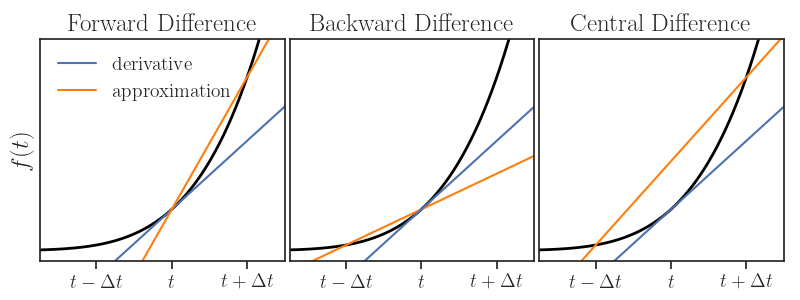

In [16]:

# Configure Matplotlib to use LaTeX font
plt.rcParams.update({
    "xtick.labelsize": 14,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

x_vals = np.linspace(0, 1, 1000)
h = 0.2
x_ref = 0.6  # Reference point for all panels

xlims = [0.25, 0.9]
ylims = [-0.02, 0.4]

fig, ax = plt.subplots(1, 3, figsize=(8,3), sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.98, top=0.87, bottom=0.13,
                    hspace=0.02, wspace=0.02)

# Panel 0 - Forward difference
ax[0].plot(x_vals, function(x_vals), color='black', linewidth=2)
ax[0].plot(x_vals, true_tangent_line(x_vals, x_ref), label="derivative")
ax[0].plot(x_vals,
           chord(x_vals,
                 x_ref,
                 forward_difference(function, x_ref, h)),
           color="tab:orange",
           label="approximation")
ax[0].set(
          ylabel=r"$f(t)$",
          title="Forward Difference",
          xlim=xlims,
          ylim=ylims,
          xticks=[x_ref-h, x_ref, x_ref+h],
          xticklabels=[r'$t-\Delta t$', r'$t$', r'$t+\Delta t$'],
          yticks=[]
          )
ax[0].legend(frameon=False, fancybox=False,
             loc="upper left", fontsize=14)

# # Panel 1 - Backward difference
ax[1].plot(x_vals, function(x_vals), color='black', linewidth=2)
ax[1].plot(x_vals,
           chord(x_vals,
                 x_ref,
                 backward_difference(function, x_ref, h)),
           color="tab:orange")
ax[1].plot(x_vals, true_tangent_line(x_vals, x_ref))
ax[1].set(title="Backward Difference")

# Panel 2 - Central difference
ax[2].plot(x_vals, function(x_vals), color='black', linewidth=2)
two_pts = np.array([x_ref-h, x_ref+h])
ax[2].plot(x_vals, true_tangent_line(x_vals, x_ref))
ax[2].plot(x_vals,
           chord(x_vals,
                 x_ref-h,
                 central_difference(function, x_ref, h)),
           color="tab:orange"
           )
ax[2].set(title="Central Difference")

fig.savefig("central_diff.png", dpi=300)

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


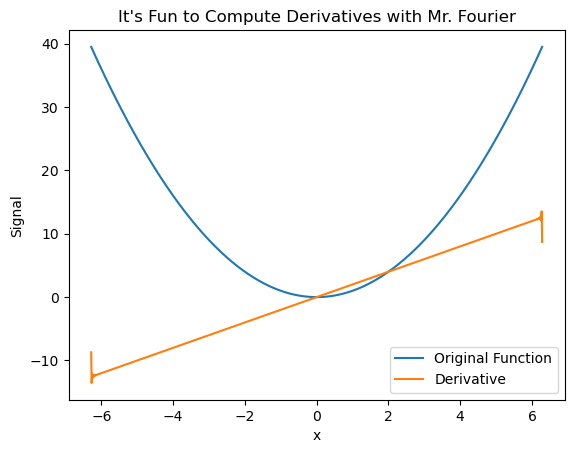

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Define the function whose derivative we want to compute
def f(x):
    # return np.sin(x)
    return x**2

# Define the domain of the function
x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_values = f(x_values)

# Compute the Fourier transform of the function
fourier_transform = fft(y_values)

# Compute the derivative in Fourier space
k_values = np.fft.fftfreq(len(x_values), x_values[1] - x_values[0])  # Frequency domain
derivative_fourier = 1j * 2*np.pi * k_values * fourier_transform

# Compute the inverse Fourier transform to get the derivative in the time domain
derivative_time_domain = ifft(derivative_fourier)

# Plot the original function and its derivative
plt.plot(x_values, y_values, label='Original Function')
plt.plot(x_values, derivative_time_domain, label='Derivative')
plt.legend()
plt.xlabel('x')
plt.ylabel('Signal')  # Updated y-label
plt.title("It's Fun to Compute Derivatives with Mr. Fourier")
plt.show()
